In [2]:
from transformers import pipeline
from PIL import Image
import requests

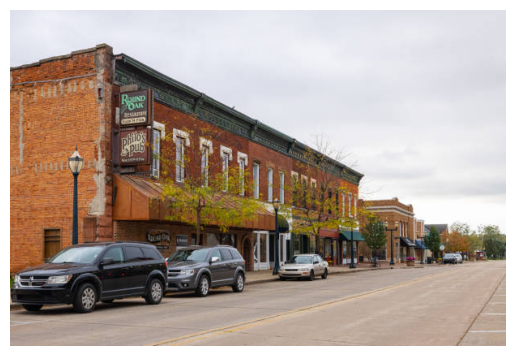

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Display the image
imgplot = plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [70]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")

# Now you can use the semantic_segmentation pipeline on an image
# For example, if you have an image file:
results = semantic_segmentation(image)

# Print the results
print(results[-1]["mask"])


<PIL.Image.Image image mode=L size=612x415 at 0x7D2E84EAEE90>


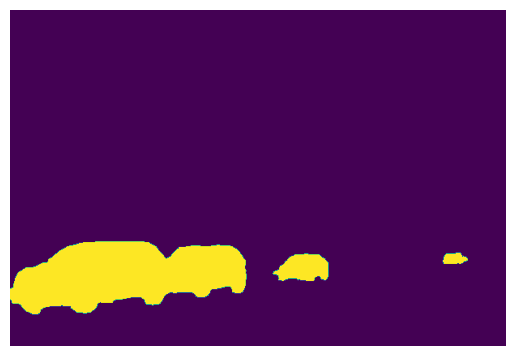

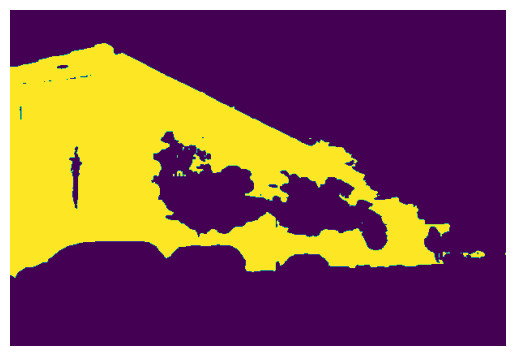

In [89]:
# Display the image
imgplot = plt.imshow(results[-1]["mask"])
plt.axis('off')  # Hide axes
plt.show()

imgplot = plt.imshow(results[2]["mask"])
plt.axis('off')  # Hide axes
plt.show()

In [74]:
import numpy as np
# Example ground truth and predicted mask arrays
true_mask = np.array([[0, 1, 1], [0, 1, 1], [0, 0, 0]])
pred_mask = np.array([[0, 1, 0], [0, 1, 1], [0, 0, 1]])


In [80]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Compute Intersection over Union (IoU)
def iou_metric(true_mask, pred_mask):
    intersection = np.sum((true_mask * pred_mask))
    union = np.sum(true_mask) + np.sum(pred_mask) - intersection
    iou = intersection / union
    return iou


# The print statement should be outside the function and aligned with the function definition
print("IoU:", iou_metric(true_mask, pred_mask))

IoU: 0.6


In [83]:
# Compute Dice Coefficient
def dice_coefficient(true_mask, pred_mask):
    intersection = np.sum(true_mask * pred_mask)
    dice = (2 * intersection) / (np.sum(true_mask) + np.sum(pred_mask))
    return dice


# The print statement should be outside the function and aligned with the function definition
print("Dice:", dice_coefficient(true_mask, pred_mask))



Dice: 0.75


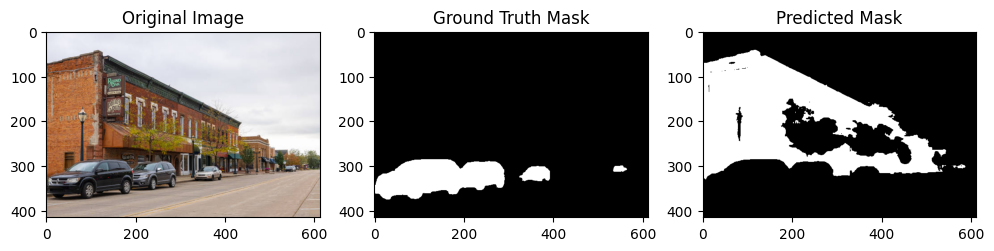

In [90]:
def plot_segmentation_results(image, ground_truth_mask, predicted_mask):
    fig, ax = plt.subplots(1, 3, figsize=(12, 6))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')

    ax[1].imshow(results[-1]["mask"], cmap='gray')
    ax[1].set_title('Ground Truth Mask')

    ax[2].imshow(results[2]["mask"], cmap='gray')
    ax[2].set_title('Predicted Mask')

    plt.show()
# Example visualization
plot_segmentation_results(image, true_mask, pred_mask)